## CSC 447 Final Project
Presented by Jawad Kabir

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("data.csv")

## 🏙️ Dataset Overview

The dataset used in this project is the **Self-Reported Drinking Water Tank Inspection Results** from NYC Open Data. It includes over **55,000 entries** spanning from **2018 to 2025**, where building owners across New York City self-report the status of their rooftop drinking water tanks.

Each record contains:
- **Geographic data**: Borough, ZIP code, coordinates
- **Structural inspections**: Internal/external structure, overflow pipes, ladders, vents
- **Sanitary indicators**: Presence of debris, insects, sediment, biological growth, birds, or rodents
- **Biological safety**: Presence of coliform or E. coli bacteria
- **Outcome label**: Whether the tank meets Department of Health (DOH) standards

This dataset provides a detailed view of drinking water tank safety across the city and serves as a basis for both unsupervised and supervised analysis.

In [ ]:
df.head()

,Unnamed: 0,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,...,MEET_STANDARDS,DELETED,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,0,1016096.0,MANHATTAN,10003.0,5,East 16th Street,844,7501,WTI3191689946,2020,...,NaN,No,40.737196,-73.992307,5.0,2.0,52.0,1.008448e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:27 PM
1,1,1079341.0,MANHATTAN,10029.0,310,East 102nd Street,1673,6,WTI7977139904,2020,...,N,No,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,East Harlem South,05/02/2025 12:15:41 PM
2,2,1028160.0,MANHATTAN,10023.0,37,West 65th Street,1118,5,WTI0840233874,2023,...,NaN,No,40.772281,-73.980363,7.0,6.0,149.0,1.011180e+09,Lincoln Square,05/02/2025 12:15:27 PM
3,3,1007832.0,MANHATTAN,10014.0,2,CHARLTON STREET,506,27,WTI9325086151,2018,...,Y,No,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,SoHo-TriBeCa-Civic Center-Little Italy,05/02/2025 12:15:20 PM
4,4,1036451.0,MANHATTAN,10022.0,560,LEXINGTON AVENUE,1305,13,WTI3391983683,2017,...,Y,No,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,Turtle Bay-East Midtown,05/02/2025 12:15:12 PM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55768 entries, 0 to 55767
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    55768 non-null  int64  
 1   BIN                           55676 non-null  float64
 2   BOROUGH                       55768 non-null  object 
 3   ZIP                           55689 non-null  float64
 4   HOUSE_NUM                     55768 non-null  object 
 5   STREET_NAME                   55768 non-null  object 
 6   BLOCK                         55768 non-null  int64  
 7   LOT                           55768 non-null  int64  
 8   CONFIRMATION_NUM              55768 non-null  object 
 9   REPORTING_YEAR                55768 non-null  int64  
 10  TANK_NUM                      55768 non-null  int64  
 11  INSPECTION_BY_FIRM            55746 non-null  object 
 12  INSPECTION_PERFORMED          55768 non-null  object 
 13  I

In [ ]:
print(df.columns)
print(df.isna().sum())
df.dropna(how="all")

Index(['Unnamed: 0', 'BIN', 'BOROUGH', 'ZIP', 'HOUSE_NUM', 'STREET_NAME',
       'BLOCK', 'LOT', 'CONFIRMATION_NUM', 'REPORTING_YEAR', 'TANK_NUM',
       'INSPECTION_BY_FIRM', 'INSPECTION_PERFORMED', 'INSPECTION_DATE',
       'GI_REQ_INTERNAL_STRUCTURE', 'GI_RESULT_INTERNAL_STRUCTURE',
       'GI_REQ_EXTERNAL_STRUCTURE', 'GI_RESULT_EXTERNAL_STRUCTURE',
       'GI_REQ_OVERFLOW_PIPES', 'GI_RESULT_OVERFLOW_PIPES',
       'GI_REQ_ACCESS_LADDERS', 'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS',
       'GI_RESULT_AIR_VENTS', 'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS',
       'SI_REQ_SEDIMENT', 'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'LAB_NAME',
       'NYS_CERTIFIED', 'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS',
       'DELETED', 'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD',
       'COUNCIL_DISTRICT', 'CEN

,Unnamed: 0,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,...,MEET_STANDARDS,DELETED,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,0,1016096.0,MANHATTAN,10003.0,5,East 16th Street,844,7501,WTI3191689946,2020,...,NaN,No,40.737196,-73.992307,5.0,2.0,52.0,1.008448e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:27 PM
1,1,1079341.0,MANHATTAN,10029.0,310,East 102nd Street,1673,6,WTI7977139904,2020,...,N,No,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,East Harlem South,05/02/2025 12:15:41 PM
2,2,1028160.0,MANHATTAN,10023.0,37,West 65th Street,1118,5,WTI0840233874,2023,...,NaN,No,40.772281,-73.980363,7.0,6.0,149.0,1.011180e+09,Lincoln Square,05/02/2025 12:15:27 PM
3,3,1007832.0,MANHATTAN,10014.0,2,CHARLTON STREET,506,27,WTI9325086151,2018,...,Y,No,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,SoHo-TriBeCa-Civic Center-Little Italy,05/02/2025 12:15:20 PM
4,4,1036451.0,MANHATTAN,10022.0,560,LEXINGTON AVENUE,1305,13,WTI3391983683,2017,...,Y,No,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,Turtle Bay-East Midtown,05/02/2025 12:15:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55763,55763,1042508.0,MANHATTAN,10021.0,955,LEXINGTON AVE,1404,52,WTI8933526969,2024,...,NaN,No,40.768868,-73.963328,8.0,4.0,120.0,1.014040e+09,Upper East Side-Carnegie Hill,05/02/2025 12:15:35 PM
55764,55764,3397571.0,BROOKLYN,11231.0,505,COURT STREET,476,7501,WTI1632579960,2017,...,N,No,40.675574,-73.999156,6.0,39.0,77.0,3.004768e+09,Carroll Gardens-Columbia Street-Red Hook,05/02/2025 12:15:09 PM
55765,55765,1089411.0,MANHATTAN,10001.0,15,Hudson Yards,702,7502,WTI3615089045,2020,...,NaN,No,40.753632,-74.003541,4.0,3.0,99.0,1.007028e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:41 PM
55766,55766,1024995.0,MANHATTAN,10036.0,330,West 45th Street,1035,47,WTI5426572966,2018,...,NaN,No,40.759590,-73.989431,4.0,3.0,121.0,1.010350e+09,Clinton,05/02/2025 12:15:19 PM


# EDA

In [ ]:
df["MEET_STANDARDS"] = df["MEET_STANDARDS"].replace({"Y": True, "N": False})

# based on the form they fill out
df["COLIFORM"] = df["COLIFORM"].replace({"P": True, "A": False})
df["ECOLI"] = df["ECOLI"].replace(
    {"P": True, "A": False}
)  # based on the form they fill out

In [ ]:
print("Duplicates:", df.duplicated().sum())
print(
    "\nStandards Distributions:\n",
    df["MEET_STANDARDS"].value_counts(normalize=True),
    sep="",
)
print(
    "\nColiform Distributions:\n", df["COLIFORM"].value_counts(normalize=True), sep=""
)

print(
    "\nEcoli Distributions:\n", df["ECOLI"].value_counts(normalize=True), sep=""
)

Duplicates: 0

Standards Distributions:
MEET_STANDARDS
True     0.599443
False    0.400557
Name: proportion, dtype: float64

Coliform Distributions:
COLIFORM
False    0.979474
True     0.020526
Name: proportion, dtype: float64

Ecoli Distributions:
ECOLI
False    0.979959
True     0.020041
Name: proportion, dtype: float64


In [ ]:
print('Unique Values in "MEET_STANDARDS":', df["MEET_STANDARDS"].unique())
num_nas = df["MEET_STANDARDS"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "MEET_STANDARDS": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "COLIFORM":', df["COLIFORM"].unique())
num_nas = df["COLIFORM"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "COLIFORM": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "ECOLI":', df["ECOLI"].unique())
num_nas = df["ECOLI"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "ECOLI": {round(num_nas / num_values, 5) * 100}%')

Unique Values in "MEET_STANDARDS": [nan False True]
Num NAN in "MEET_STANDARDS": 80.048%

Unique Values in "COLIFORM": [False True nan]
Num NAN in "COLIFORM": 0.23700000000000002%

Unique Values in "ECOLI": [False True nan]
Num NAN in "ECOLI": 0.23700000000000002%


In [ ]:
relevant_features = ["ECOLI", "COLIFORM", "MEET_STANDARDS"]

descriptive_stats = df[relevant_features].agg(["mean", "median", "std"])
print(descriptive_stats)

           ECOLI  COLIFORM  MEET_STANDARDS
mean    0.020041  0.020526        0.599443
median  0.000000  0.000000        1.000000
std     0.140142  0.141793        0.490033


In [ ]:
borough_pct = df.groupby('BOROUGH')['MEET_STANDARDS'].mean() * 100
borough_pct = borough_pct.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=borough_pct, x='BOROUGH', y='MEET_STANDARDS', errorbar=None)
plt.title("Percentage Meeting Standards by Borough")
plt.ylabel("Percentage Meeting Standards (%)")
plt.xlabel("Borough")
plt.ylim(98, 100)
plt.show()

KeyError: 'BOROUGH'

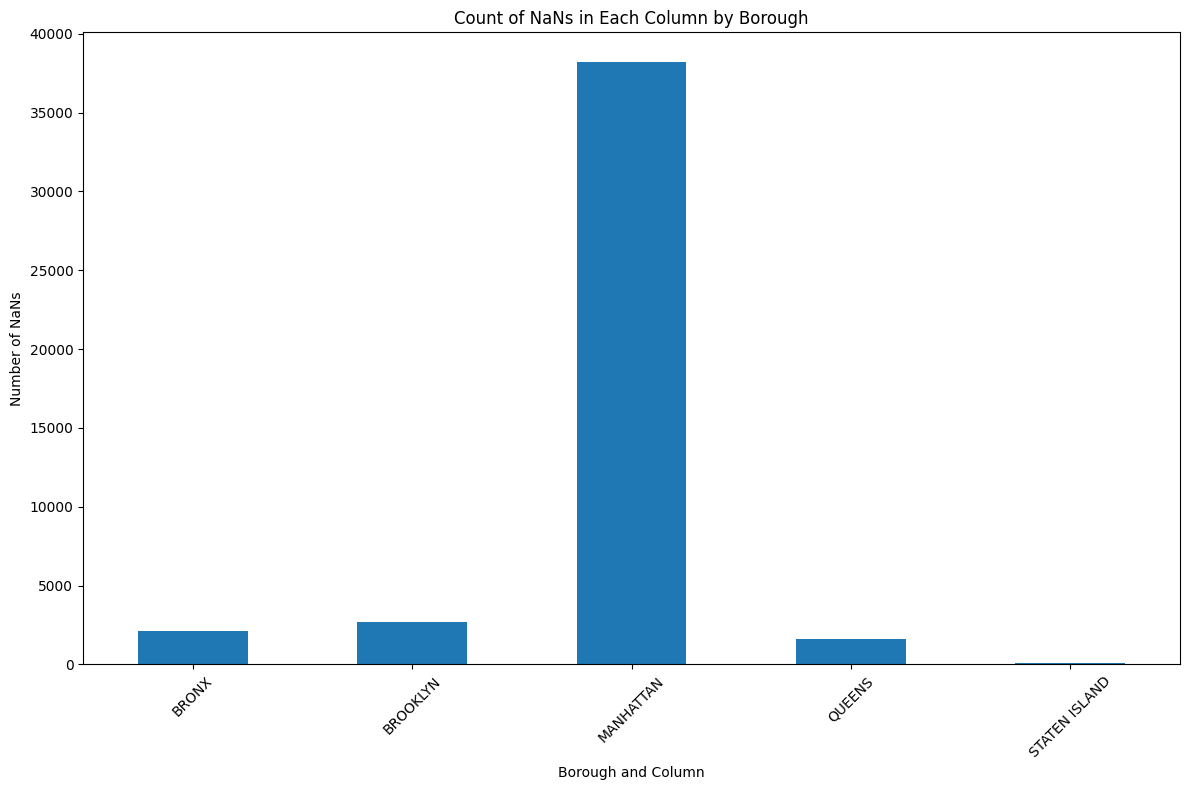

In [ ]:
import matplotlib.pyplot as plt

nan_counts_by_borough = df.groupby('BOROUGH')['MEET_STANDARDS'].apply(lambda x: x.isna().sum())

nan_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of NaNs in Each Column by Borough")
plt.ylabel("Number of NaNs")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

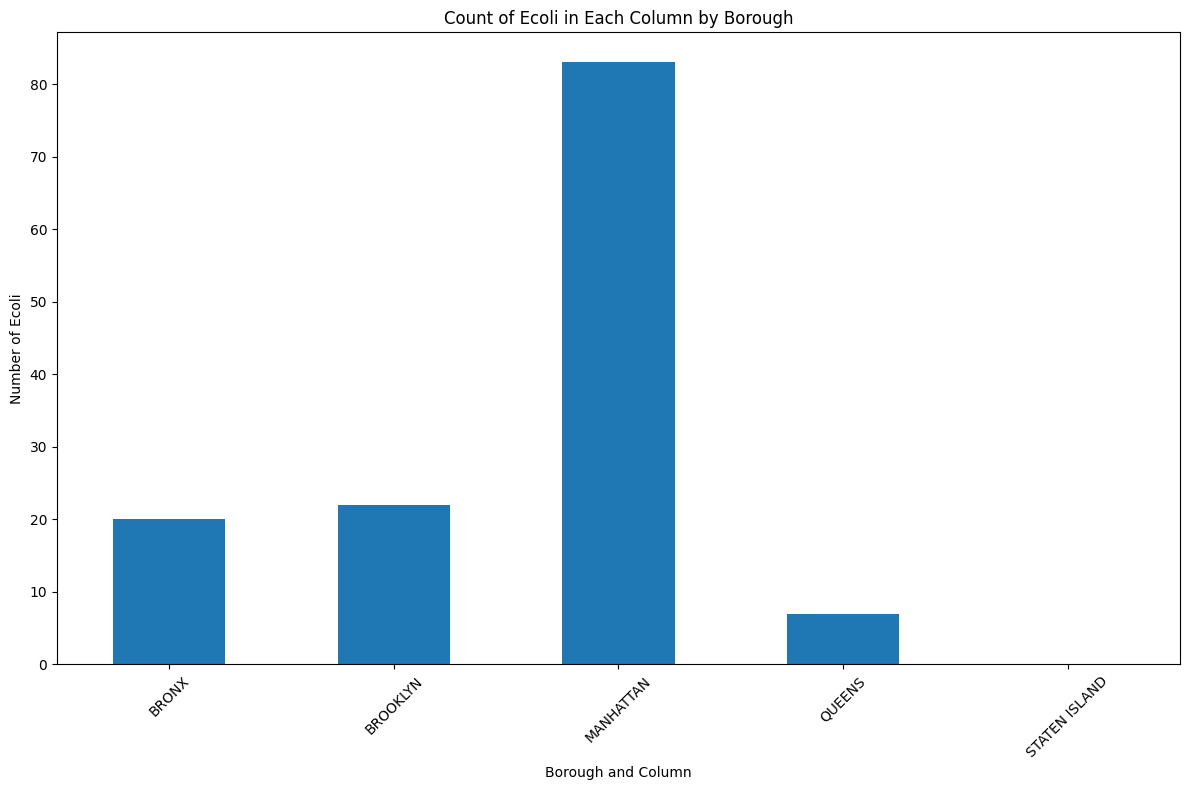

In [ ]:
import matplotlib.pyplot as plt

nan_counts_by_borough = df.groupby("BOROUGH")["ECOLI"].apply(
    lambda x: x.isna().sum()
)

nan_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of Ecoli in Each Column by Borough")
plt.ylabel("Number of Ecoli")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

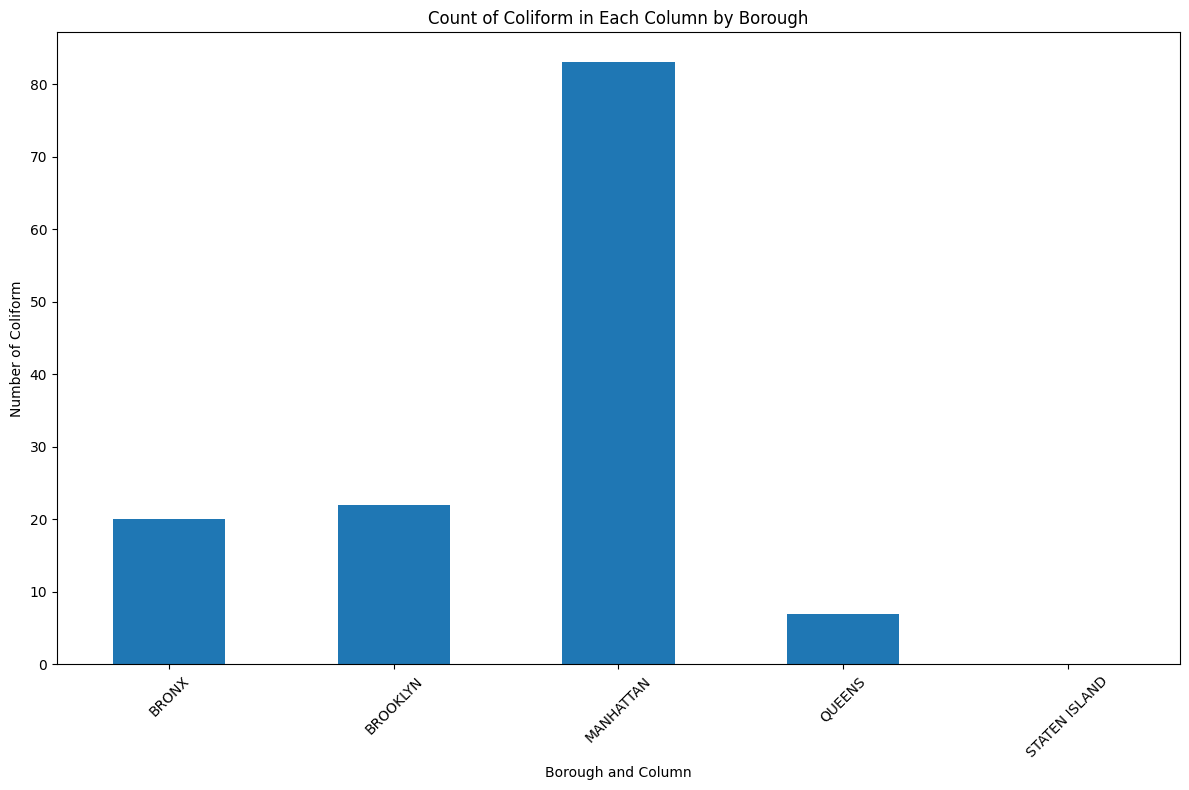

In [ ]:
import matplotlib.pyplot as plt

nan_counts_by_borough = df.groupby("BOROUGH")["COLIFORM"].apply(lambda x: x.isna().sum())

nan_counts_by_borough.plot(kind="bar", figsize=(12, 8))
plt.title("Count of Coliform in Each Column by Borough")
plt.ylabel("Number of Coliform")
plt.xlabel("Borough and Column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Water Quality Parameters by Borough

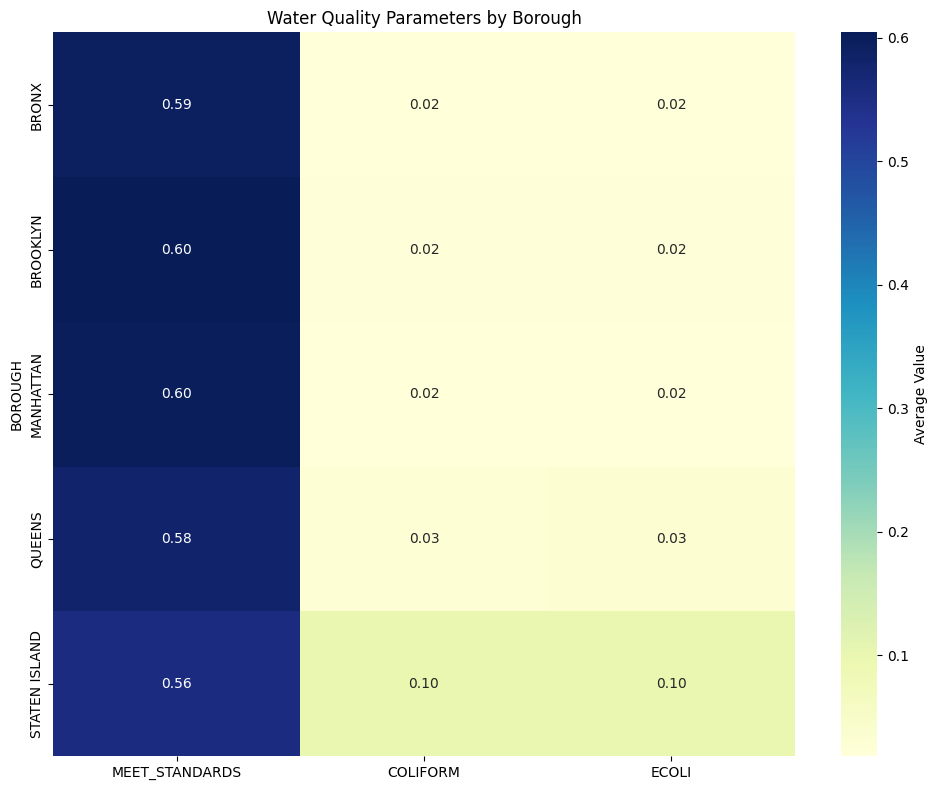

In [ ]:
df["MEET_STANDARDS"] = pd.to_numeric(df["MEET_STANDARDS"], errors="coerce")
df["COLIFORM"] = pd.to_numeric(df["COLIFORM"], errors="coerce")
df["ECOLI"] = pd.to_numeric(df["ECOLI"], errors="coerce")


water_params = ["MEET_STANDARDS", "COLIFORM", "ECOLI"]
heatmap_data = df.groupby("BOROUGH")[water_params].mean()

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    cbar_kws={"label": "Average Value"},
)
plt.title("Water Quality Parameters by Borough")
plt.tight_layout()
plt.show()

In [ ]:
df["YEAR"] = pd.to_datetime(df["BATCH_DATE"]).dt.year

print("Unique Years in Dataset", df["YEAR"].unique())

Unique Years in Dataset [2025]


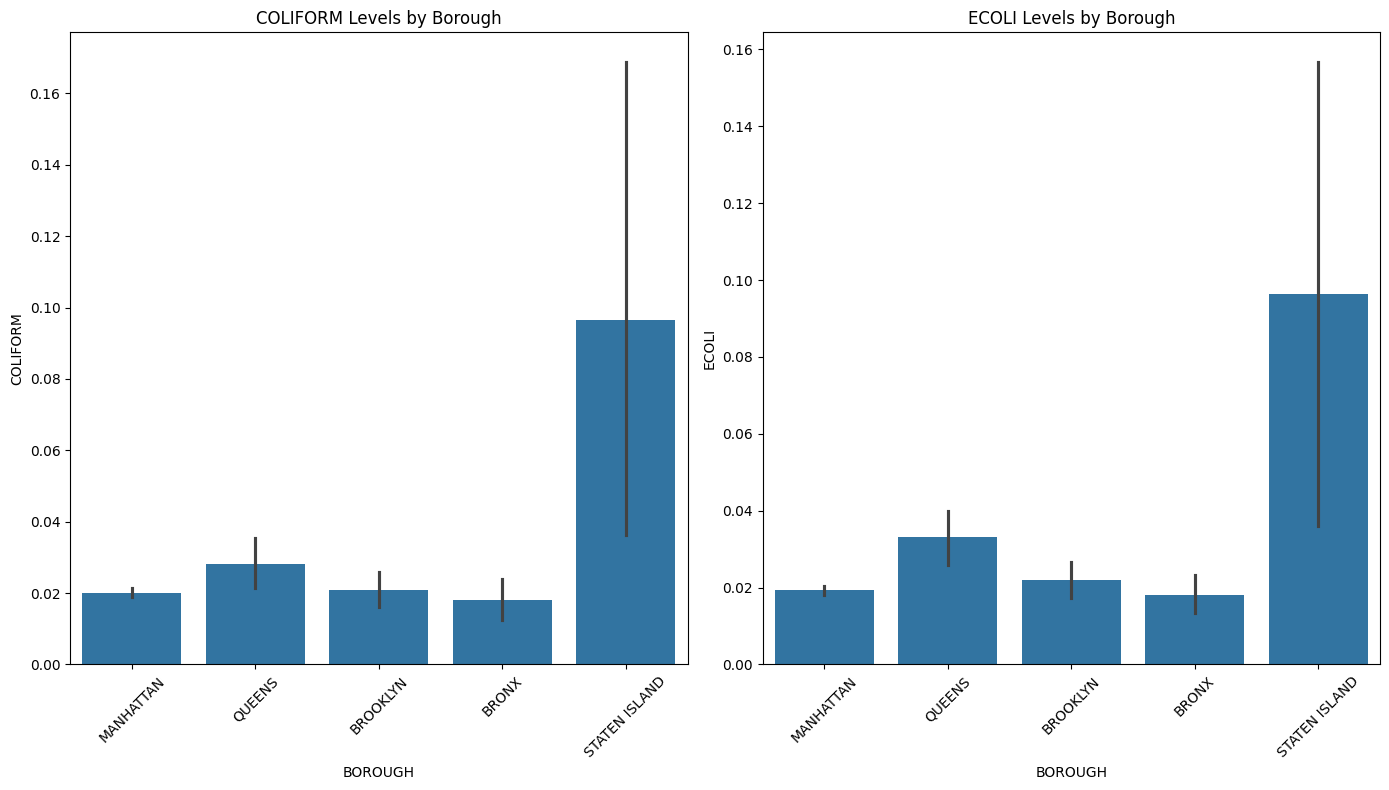

In [ ]:
plt.figure(figsize=(14, 8))
params_to_plot = ["COLIFORM", "ECOLI"]

for i, param in enumerate(params_to_plot):
    plt.subplot(1, len(params_to_plot), i + 1)
    sns.barplot(x="BOROUGH", y=param, data=df)
    plt.title(f"{param} Levels by Borough")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

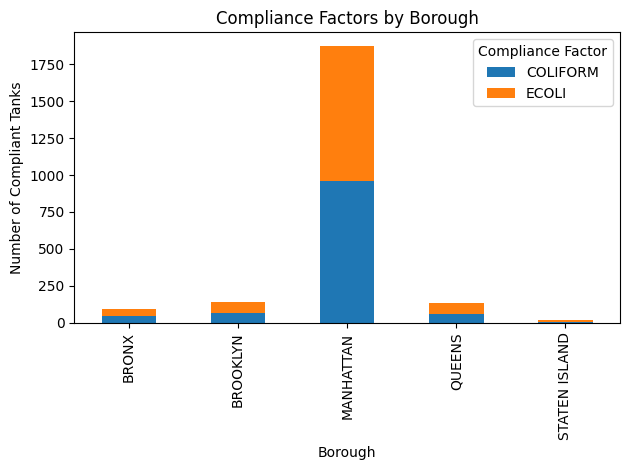

In [ ]:
compliance_cols = ["COLIFORM", "ECOLI"]
compliance_counts = df.groupby("BOROUGH")[compliance_cols].sum()

plt.figure(figsize=(12, 6))
compliance_counts.plot(kind="bar", stacked=True)
plt.title("Compliance Factors by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Compliant Tanks")
plt.legend(title="Compliance Factor")
plt.tight_layout()
plt.show()

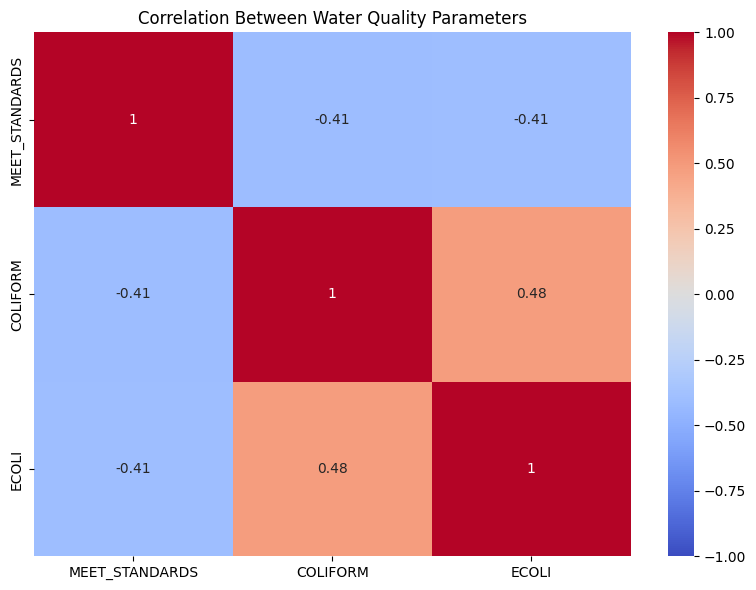

In [ ]:
corr_columns = ["MEET_STANDARDS", "COLIFORM", "ECOLI"]
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Water Quality Parameters")
plt.tight_layout()
plt.show()

Countplots for the three big water quality labels:

Text(0.5, 1.0, 'Standards Passed vs Failed per Borough')

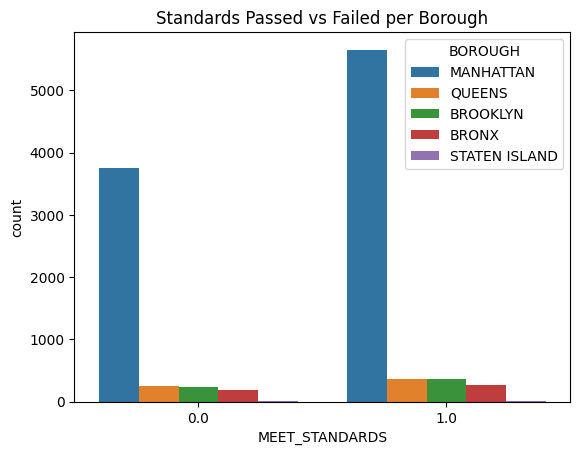

In [ ]:
sns.countplot(data=df, x="MEET_STANDARDS", hue="BOROUGH")
plt.title("Standards Passed vs Failed per Borough")

Text(0.5, 1.0, 'Standards Passed vs Failed per Borough')

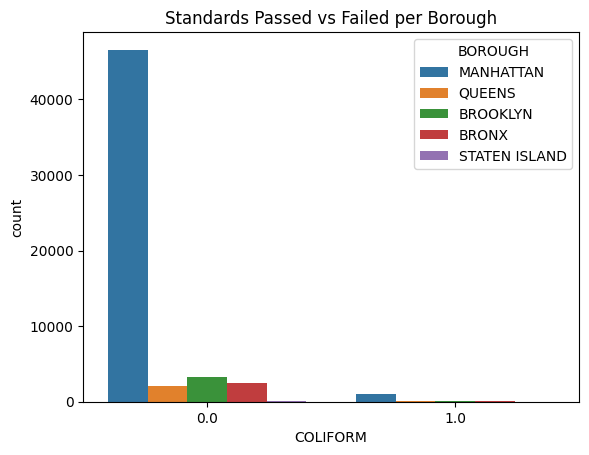

In [ ]:
sns.countplot(data=df, x="COLIFORM", hue="BOROUGH")
plt.title("Standards Passed vs Failed per Borough")

Text(0.5, 1.0, 'Standards Passed vs Failed per Borough')

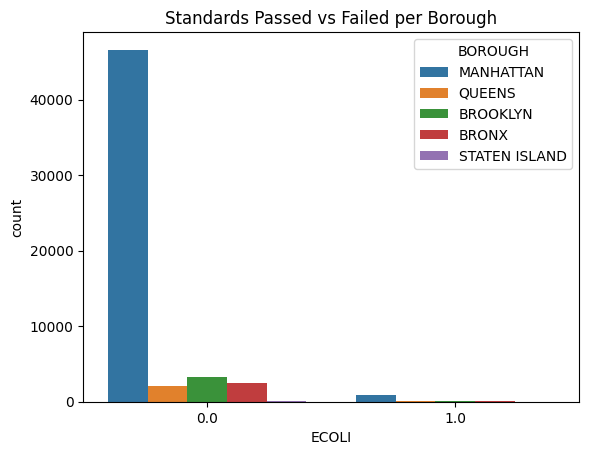

In [ ]:
sns.countplot(data=df, x="ECOLI", hue="BOROUGH")
plt.title("Standards Passed vs Failed per Borough")

## 🎯 Project Goal

Our primary goal is to assess whether **structural and sanitary conditions** of water tanks show distinct patterns across NYC and whether these conditions can help **predict compliance with health standards**.

We split the project into two parts:
- **Unsupervised Clustering**: To explore natural groupings of tanks based on condition
- **Supervised Classification**: To predict if a tank meets DOH standards using inspection results


## 🤔 Hypotheses

1. **Clustering Hypothesis**:  
   Water tanks will form **distinct clusters** based on structural and sanitary conditions.  
   These clusters may align with specific **boroughs**, revealing geographic disparities.

2. **Classification Hypothesis**:  
   Certain inspection results (like **coliform presence** or **debris detection**) are strong indicators of a tank **failing** DOH standards.  
   These patterns can be captured using classification models.

## 🧠 Methodology

### Clustering:
- **Feature selection**: Chose relevant features such as coliform presence, borough, and all `GI_RESULT_` structural checks.
- **Encoding**: Used one-hot encoding to convert categorical features to numeric form.
- **Missing data**: Dropped rows with missing values in key inspection columns.
- **Clustering**: Applied **K-Means clustering**, experimenting with different values of `k`.
- **Evaluation**: Used the **Elbow Method** to find optimal `k` and **Silhouette Score** to evaluate cluster separation.
- **Visualization**: Used **PCA** to reduce dimensionality and visualize clusters in 2D.

### Classification:
- **Label**: Used `MEET_STANDARDS` as the binary outcome (`Y`/`N`).
- **Baseline model**: Logistic regression
- **Advanced models**: Random Forest, Gradient Boosting
- **Metrics**: Accuracy, precision, recall, F1-score

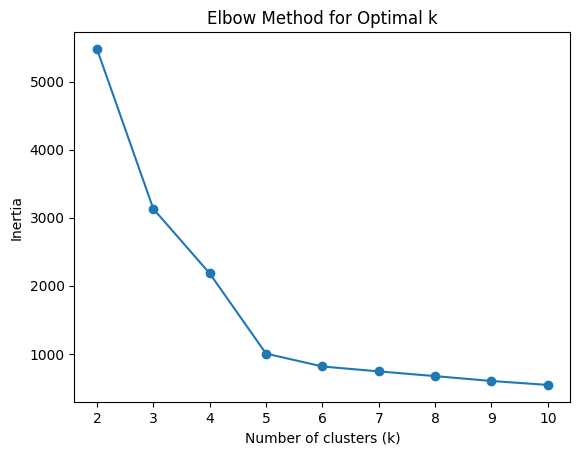

In [ ]:
#going to redefine the data
from sklearn.cluster import KMeans
gi_cols = [col for col in df.columns if col.startswith('GI_RESULT')]
features = ['BOROUGH', 'COLIFORM'] + gi_cols
data = df[features].dropna()

# One-hot encode categorical features
data_enc = pd.get_dummies(data, columns=features, drop_first=True)

# Elbow method to find optimal k
inertias = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_enc)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


We can see that the optimal k we should use is either 4 or 5. lets use 5

In [ ]:
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(data_enc)
data['cluster'] = clusters

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_enc, clusters) #get silhouette score to evaluate the clustering
print(f"Silhouette Score for k={k_opt}: {score:.3f}")

#Cluster counts
cluster_counts = data['cluster'].value_counts().sort_index().to_frame('count')
print("\nCluster Counts:")
print(cluster_counts)

Silhouette Score for k=5: 0.977

Cluster Counts:
         count
cluster       
0        46506
1         3263
2         2595
3          956
4         2194


As we can see with our silhouette score, we have really strong and well-separated clusters. Points are close to their own respective cluster centroid, and clusters have low inter-cluster similarity (clusters are distinct and dont overlap)

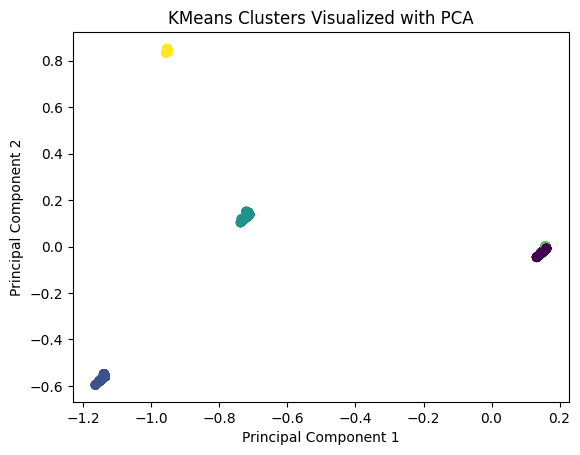

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(data_enc)

plt.figure()
plt.scatter(components[:, 0], components[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Visualized with PCA')
plt.show()

Principal Component 1 and 2 are linear combinations of encoded features like borough, structural inspection results, and coliform presence. These components represent the directions of maximum variance in the data and are used here for 2D visualization of cluster separability.


Now we'll see these clusters per borough to get meaningful answers to our first hypothesis

In [ ]:
pca_df = pd.DataFrame(pca.components_, columns=data_enc.columns, index=['PC1', 'PC2']).T
top_features = pca_df.abs().sort_values(by='PC1', ascending=False).head(10)
print(top_features)

                                     PC1       PC2
BOROUGH_MANHATTAN               0.873685  0.144992
BOROUGH_BROOKLYN                0.423831  0.694738
BOROUGH_QUEENS                  0.238433  0.704247
GI_RESULT_ROOF_ACCESS_N         0.007141  0.008086
BOROUGH_STATEN ISLAND           0.006081  0.003997
GI_RESULT_ACCESS_LADDERS_N      0.005668  0.006898
GI_RESULT_EXTERNAL_STRUCTURE_N  0.005154  0.007511
GI_RESULT_INTERNAL_STRUCTURE_N  0.004653  0.006519
GI_RESULT_OVERFLOW_PIPES_N      0.003062  0.004575
COLIFORM_1.0                    0.002714  0.009351


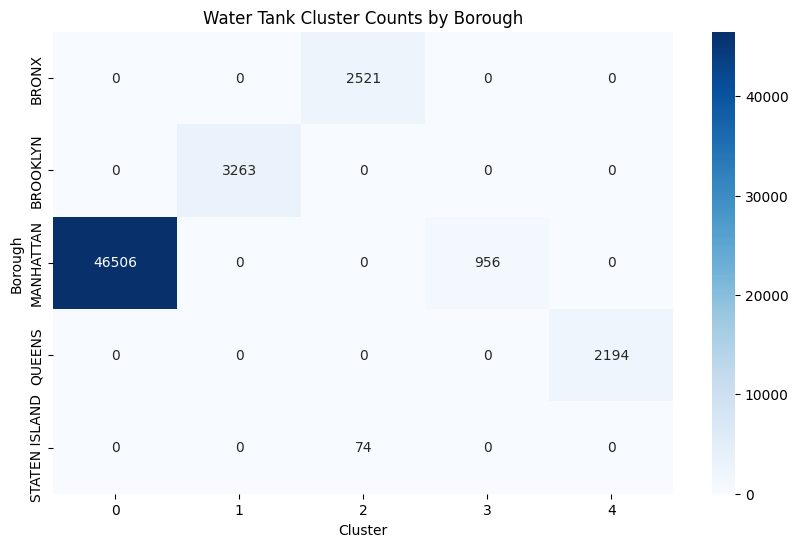

In [ ]:
df_clusters = df.loc[data.index].copy()
df_clusters['cluster'] = data['cluster'].values

# Group by borough and cluster
borough_cluster_counts = df_clusters.groupby(['BOROUGH', 'cluster']).size().unstack(fill_value=0)

import seaborn as sns
import matplotlib.pyplot as plt

# Display as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(borough_cluster_counts, annot=True, fmt='d', cmap='Blues')
plt.title("Water Tank Cluster Counts by Borough")
plt.ylabel("Borough")
plt.xlabel("Cluster")
plt.show()

We can see that the clusters are not evenly distributed across the boroughs. Some boroughs have a higher concentration of certain clusters, indicating that the water quality parameters and inspection results may vary significantly by location.

It's interesting to see manhattan dominate as much as it does over the first cluster, cluster 0, and our last cluster, cluster 4, has a mix of 4 boroughs (realistically its 3 since 1 isnt representative enough)

These results confirm our initial hypothesis: boroughs do tend to cluster separately based on structural inspection results and coliform presence. Manhattan's dominance in Cluster 0 reflects a pattern of cleaner tanks, while other boroughs form unique clusters representing varying degrees of structural or sanitary issues.


## ✅ Clustering Summary

- We used KMeans clustering and PCA to identify natural groupings of water tanks across NYC.
- The clusters aligned strongly with boroughs, validating our hypothesis.
- Manhattan consistently fell into the ‘cleanest’ cluster, while other boroughs had clusters that represented varying structural or sanitary issues.

This sets the foundation for our next step: using classification models to predict whether a tank from a given borough meets health standards.


# Preprocessing

In [ ]:
df_preprocess = df.copy()

In [ ]:
num_unique_inpection_firms = len(df_preprocess["INSPECTION_BY_FIRM"].unique())
print(f"Number of unique inspection firms: {num_unique_inpection_firms}")

Number of unique inspection firms: 538


In [ ]:
df_preprocess.drop(["HOUSE_NUM", "STREET_NAME", "CONFIRMATION_NUM", "INSPECTION_BY_FIRM", "REPORTING_YEAR", "LAB_NAME", "INSPECTION_DATE", "BATCH_DATE", "NTA"], axis=1, inplace=True)

encode all string columns to floats

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['BOROUGH']
encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
encoded_columns = encoder.fit_transform(df_preprocess[["BOROUGH"]])

In [ ]:
encoded_train = pd.DataFrame(
    encoder.transform(df_preprocess[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns),
    index=df_preprocess.index,
)

In [ ]:
df_preprocess = pd.concat(
    [df_preprocess.drop(columns=categorical_columns), encoded_train], axis=1
)

In [ ]:
df_preprocess["COLIFORM"] = df_preprocess["COLIFORM"].map({'A': 0, "P": 1})
df_preprocess["ECOLI"] = df_preprocess["ECOLI"].map({'A': 0, "P": 1})

In [ ]:
for col in df_preprocess.columns:
    if df_preprocess[col].dtype == "object":
      print(col, ":", df_preprocess[col].unique())

INSPECTION_PERFORMED : ['Y' 'N' nan]
GI_REQ_INTERNAL_STRUCTURE : ['Y' 'N' nan]
GI_RESULT_INTERNAL_STRUCTURE : ['N' 'A' nan]
GI_REQ_EXTERNAL_STRUCTURE : ['Y' 'N' nan]
GI_RESULT_EXTERNAL_STRUCTURE : ['N' 'A' nan]
GI_REQ_OVERFLOW_PIPES : ['Y' 'N' nan]
GI_RESULT_OVERFLOW_PIPES : ['N' 'A' nan]
GI_REQ_ACCESS_LADDERS : ['Y' 'N' nan]
GI_RESULT_ACCESS_LADDERS : ['N' 'A' nan]
GI_REQ_AIR_VENTS : ['Y' 'N' nan]
GI_RESULT_AIR_VENTS : ['N' 'A' nan]
GI_REQ_ROOF_ACCESS : ['Y' 'N' nan]
GI_RESULT_ROOF_ACCESS : ['N' 'A' nan]
SI_REQ_SEDIMENT : ['Y' 'N' nan]
SI_RESULT_SEDIMENT : ['N' 'A' nan]
SI_REQ_BIOLOGICAL_GROWTH : ['Y' 'N' nan]
SI_RESULT_BIOLOGICAL_GROWTH : ['N' 'A' nan]
SI_REQ_DEBRIS_INSECTS : ['Y' 'N' nan]
SI_RESULT_DEBRIS_INSECTS : ['N' 'A' nan]
SI_REQ_RODENT_BIRD : ['Y' 'N' nan]
SI_RESULT_RODENT_BIRD : ['N' 'A' nan]
SAMPLE_COLLECTED : ['Y' 'N' nan]
NYS_CERTIFIED : ['Y' nan 'D' 'N']
ANALYTES : ['B' nan]
MEET_STANDARDS : [nan 'N' 'Y']
DELETED : ['No' 'Yes' nan]


manually convert all Y/Ns to true/false

In [ ]:
yns = [
      "INSPECTION_PERFORMED", "GI_REQ_INTERNAL_STRUCTURE", "GI_RESULT_INTERNAL_STRUCTURE",
      "GI_REQ_EXTERNAL_STRUCTURE", "GI_RESULT_EXTERNAL_STRUCTURE", "GI_REQ_OVERFLOW_PIPES",
      "GI_RESULT_OVERFLOW_PIPES", "GI_REQ_ACCESS_LADDERS", "GI_RESULT_ACCESS_LADDERS",
      "GI_REQ_AIR_VENTS", "GI_RESULT_AIR_VENTS", "GI_REQ_ROOF_ACCESS", "GI_RESULT_ROOF_ACCESS",
      "SI_REQ_SEDIMENT", "SI_RESULT_SEDIMENT", "SI_REQ_BIOLOGICAL_GROWTH", "SI_RESULT_BIOLOGICAL_GROWTH",
      "SI_REQ_DEBRIS_INSECTS", "SI_RESULT_DEBRIS_INSECTS", "SI_REQ_RODENT_BIRD", "SI_RESULT_RODENT_BIRD", "SAMPLE_COLLECTED",
      "NYS_CERTIFIED", "ANALYTES", "DELETED", "MEET_STANDARDS"
      ]

for col in yns:
    df_preprocess[col] = df_preprocess[col].map({'Y': 1, "N": 0, "A": 1, "B": 1, "D": 0, "No": 0, "Yes": 1})

'''
According to the inspection form -> "A" means corrective action taken, therefore something WAS there therefore True

Yes -> True
No -> False

B in Analytes means "Bacteria" found in tank, therefore True

Form in Question:
https://www.nyc.gov/assets/doh/downloads/pdf/environmental/drinking-water-inspection-form.pdf
'''

'\nAccording to the inspection form -> "A" means corrective action taken, therefore something WAS there therefore True\n\nYes -> True\nNo -> False\n\nB in Analytes means "Bacteria" found in tank, therefore True\n\nForm in Question:\nhttps://www.nyc.gov/assets/doh/downloads/pdf/environmental/drinking-water-inspection-form.pdf\n'

In [ ]:
for col in df_preprocess.columns:
    if df_preprocess[col].dtype == "object":
      print(col, ":", df_preprocess[col].unique())

In [ ]:
df.columns

Index(['Unnamed_0', 'BIN', 'BOROUGH', 'ZIP', 'HOUSE_NUM', 'STREET_NAME',
       'BLOCK', 'LOT', 'CONFIRMATION_NUM', 'REPORTING_YEAR', 'TANK_NUM',
       'INSPECTION_BY_FIRM', 'INSPECTION_PERFORMED', 'INSPECTION_DATE',
       'GI_REQ_INTERNAL_STRUCTURE', 'GI_RESULT_INTERNAL_STRUCTURE',
       'GI_REQ_EXTERNAL_STRUCTURE', 'GI_RESULT_EXTERNAL_STRUCTURE',
       'GI_REQ_OVERFLOW_PIPES', 'GI_RESULT_OVERFLOW_PIPES',
       'GI_REQ_ACCESS_LADDERS', 'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS',
       'GI_RESULT_AIR_VENTS', 'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS',
       'SI_REQ_SEDIMENT', 'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'LAB_NAME',
       'NYS_CERTIFIED', 'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS',
       'DELETED', 'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD',
       'COUNCIL_DISTRICT', 'CENS

## Treat NANs

In [ ]:
# drop all NANs for y -> "MEET_STANDARDS"
df_preprocess.dropna(subset=["MEET_STANDARDS"], inplace=True)

In [ ]:
print("SIZE:", df_preprocess.shape)
df_preprocess.isna().sum()

SIZE: (6037, 44)


,0
Unnamed_0,0
BIN,7
ZIP,7
BLOCK,0
LOT,0
TANK_NUM,0
INSPECTION_PERFORMED,0
GI_REQ_INTERNAL_STRUCTURE,0
GI_RESULT_INTERNAL_STRUCTURE,14
GI_REQ_EXTERNAL_STRUCTURE,0


In [ ]:
import unicodedata
import re
def clean_feature_name(name):
    # Normalize to NFKD Unicode, encode to ASCII bytes, decode back to ASCII string
    name_ascii = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode('ascii')
    # Replace forbidden/special characters with underscore
    name_ascii = re.sub(r'[{}\[\]:,"\'/&%#@$\(\).]', '_', name_ascii)
    # Remove any remaining non-alphanumeric or underscore characters
    name_ascii = re.sub(r'[^a-zA-Z0-9_]', '', name_ascii)
    return name_ascii

# Apply to all columns
df_preprocess.columns = [clean_feature_name(col) for col in df_preprocess.columns]


In [ ]:
!pip install miceforest --no-cache-dir

In [ ]:
from miceforest import ImputationKernel

df_clone = df_preprocess.copy()
df_clone.reset_index(inplace=True, drop=True)
kernel = ImputationKernel(data=df_clone, random_state=420)
kernel.mice(2)
df_imputed = kernel.complete_data()

In [ ]:
df_imputed

,Unnamed_0,BIN,ZIP,BLOCK,LOT,TANK_NUM,INSPECTION_PERFORMED,GI_REQ_INTERNAL_STRUCTURE,GI_RESULT_INTERNAL_STRUCTURE,GI_REQ_EXTERNAL_STRUCTURE,...,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATENISLAND
0,1,1079341.0,10029.0,1673,6,1.0,1.0,1.0,0.0,1.0,...,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,0.0,1.0,0.0,0.0
1,3,1007832.0,10014.0,506,27,1.0,1.0,1.0,0.0,1.0,...,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,0.0,1.0,0.0,0.0
2,4,1036451.0,10022.0,1305,13,1.0,1.0,1.0,0.0,1.0,...,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,0.0,1.0,0.0,0.0
3,6,1082365.0,10128.0,1573,1,2.0,1.0,1.0,0.0,1.0,...,40.781684,-73.945848,8.0,5.0,152.0,1.015730e+09,0.0,1.0,0.0,0.0
4,21,4432046.0,11375.0,2133,16,1.0,1.0,1.0,0.0,1.0,...,40.728526,-73.851538,6.0,29.0,71304.0,4.021330e+09,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,29854,1008787.0,10003.0,544,73,1.0,1.0,1.0,0.0,1.0,...,40.727666,-73.992716,2.0,2.0,57.0,1.005440e+09,0.0,1.0,0.0,0.0
6033,29857,1015916.0,10018.0,837,7501,1.0,1.0,1.0,0.0,1.0,...,40.750744,-73.986072,5.0,4.0,84.0,1.008378e+09,0.0,1.0,0.0,0.0
6034,29866,1014771.0,10011.0,797,18,1.0,1.0,1.0,0.0,1.0,...,40.742082,-73.994807,4.0,3.0,87.0,1.007970e+09,0.0,1.0,0.0,0.0
6035,29869,1014571.0,10011.0,791,78,1.0,1.0,1.0,0.0,1.0,...,40.739370,-73.997525,4.0,3.0,81.0,1.007910e+09,0.0,1.0,0.0,0.0


In [ ]:
df = df_imputed

In [ ]:
df.isna().sum()

,0
Unnamed_0,0
BIN,0
ZIP,0
BLOCK,0
LOT,0
TANK_NUM,0
INSPECTION_PERFORMED,0
GI_REQ_INTERNAL_STRUCTURE,0
GI_RESULT_INTERNAL_STRUCTURE,0
GI_REQ_EXTERNAL_STRUCTURE,0


stats

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6037 entries, 0 to 6036
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed_0                     6037 non-null   int64  
 1   BIN                           6037 non-null   float64
 2   ZIP                           6037 non-null   float64
 3   BLOCK                         6037 non-null   int64  
 4   LOT                           6037 non-null   int64  
 5   TANK_NUM                      6037 non-null   float64
 6   INSPECTION_PERFORMED          6037 non-null   float64
 7   GI_REQ_INTERNAL_STRUCTURE     6037 non-null   float64
 8   GI_RESULT_INTERNAL_STRUCTURE  6037 non-null   float64
 9   GI_REQ_EXTERNAL_STRUCTURE     6037 non-null   float64
 10  GI_RESULT_EXTERNAL_STRUCTURE  6037 non-null   float64
 11  GI_REQ_OVERFLOW_PIPES         6037 non-null   float64
 12  GI_RESULT_OVERFLOW_PIPES      6037 non-null   float64
 13  GI_

In [ ]:
bad_counts = (df["MEET_STANDARDS"] == 0).sum() + (df["ECOLI"] == 1).sum() + (df["COLIFORM"] == 1).sum()
bad_counts

np.int64(3644)

# Feature Selection/Dimensionality Reduction

In [ ]:
label = "MEET_STANDARDS"

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=[label])
y = df[label]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

rf_feature_importances = pd.DataFrame(
    {"Feature": X.columns, "Importance": model.feature_importances_}
).sort_values(by="Importance", ascending=False)

rf_feature_importances

,Feature,Importance
0,Unnamed_0,0.261079
30,COLIFORM,0.118745
31,ECOLI,0.116316
34,LONGITUDE,0.072136
33,LATITUDE,0.071062
1,BIN,0.070527
4,LOT,0.062779
38,BBL,0.057537
3,BLOCK,0.055384
37,CENSUS_TRACT,0.040271


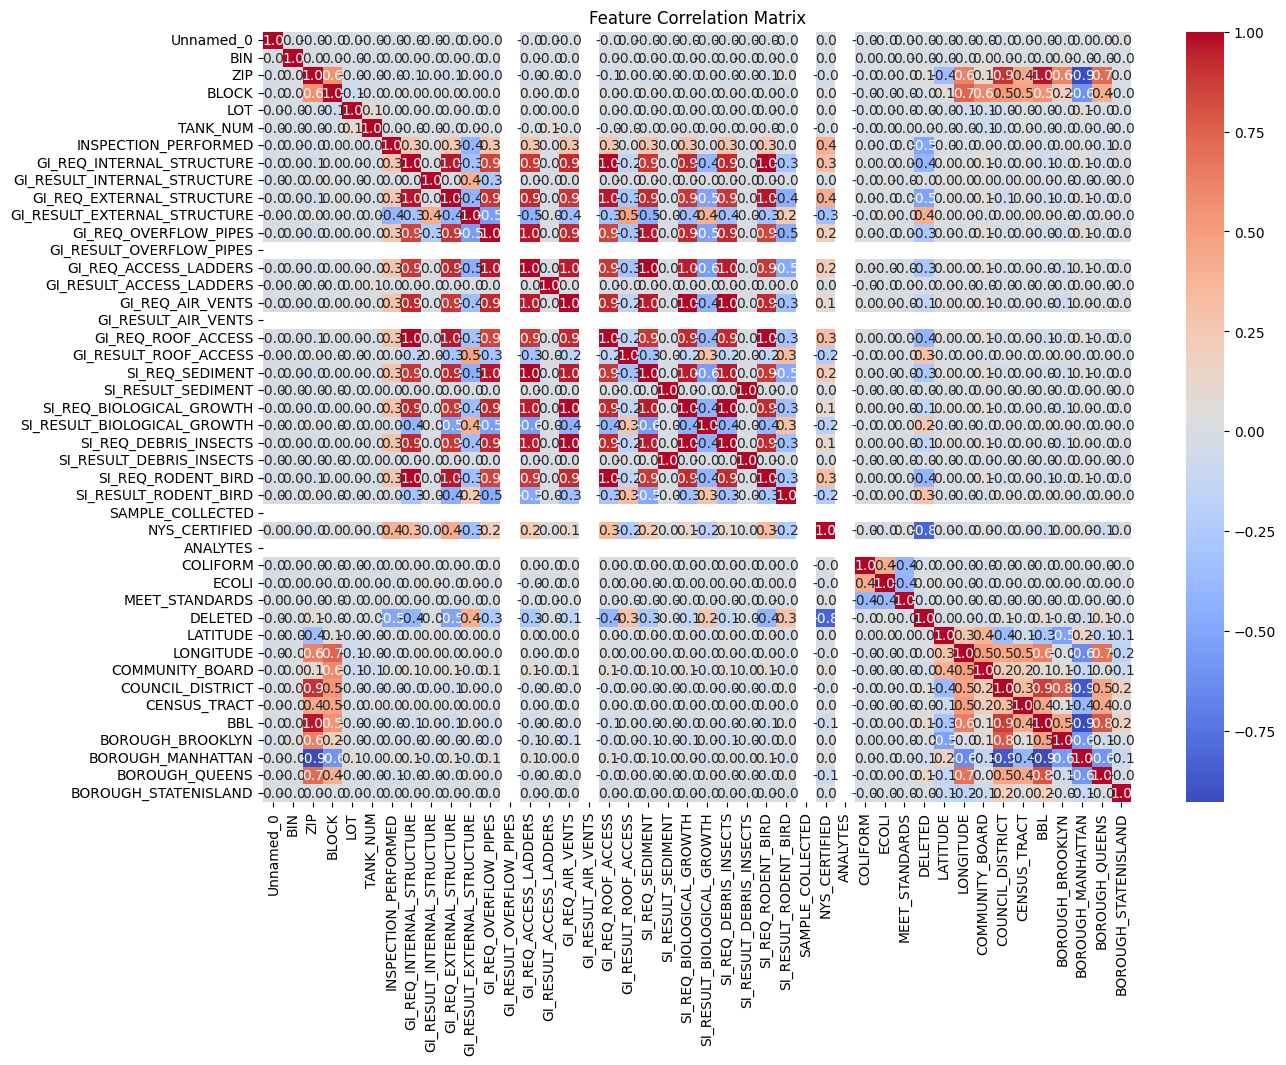

Correlations with Survival:


,MEET_STANDARDS
MEET_STANDARDS,1.000000
NYS_CERTIFIED,0.027348
INSPECTION_PERFORMED,0.015526
LATITUDE,0.011544
Unnamed_0,0.011095
GI_RESULT_ACCESS_LADDERS,0.010670
BOROUGH_MANHATTAN,0.010576
BIN,0.010284
SI_RESULT_BIOLOGICAL_GROWTH,0.008245
GI_REQ_EXTERNAL_STRUCTURE,0.006028


In [ ]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Feature Correlation Matrix")
plt.show()

corr_survival_correlations = corr_matrix["MEET_STANDARDS"].sort_values(ascending=False)
print("Correlations with Survival:")
corr_survival_correlations

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X_num = df.select_dtypes(include=[np.number])
X_num = X_num.drop(columns=[label])

estimator = LogisticRegression(max_iter=10000)

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_num, y)

rfe_selected_features = X_num.columns[selector.support_]
print("Features selected by RFE:")
rfe_selected_features

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Features selected by RFE:


Index(['SI_RESULT_BIOLOGICAL_GROWTH', 'NYS_CERTIFIED', 'COLIFORM', 'ECOLI',
       'DELETED'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

encoded_cols = [
    col
    for col in df.columns
    if col.startswith(f"BOROUGH_")
]

X_cat = df[encoded_cols]
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X_cat, y)


ch2_selected_features = X_cat.columns[selector.get_support()]
print("Top encoded categorical features by chi-squared test:")
ch2_selected_features

Top encoded categorical features by chi-squared test:


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Index(['BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN', 'BOROUGH_QUEENS',
       'BOROUGH_STATENISLAND'],
      dtype='object')

In [ ]:
corr = []
for key, value in corr_survival_correlations.items():
    if key != label:
      corr.append(key)

In [ ]:
rf = []
for key, value in rf_feature_importances.items():
    if key != label:
      rf.append(key)

In [ ]:
best_features = list(set(rfe_selected_features) | set(ch2_selected_features) | set(corr[:5]) | set(corr[:5]))
best_features

['GI_RESULT_ACCESS_LADDERS',
 'SI_RESULT_BIOLOGICAL_GROWTH',
 'BOROUGH_MANHATTAN',
 'DELETED',
 'NYS_CERTIFIED',
 'BOROUGH_QUEENS',
 'ECOLI',
 'BOROUGH_BROOKLYN',
 'INSPECTION_PERFORMED',
 'LATITUDE',
 'BOROUGH_STATENISLAND',
 'COLIFORM',
 'Unnamed_0']

In [ ]:
df.shape

(6037, 44)

Note for others, use the `best_features` list as the features

# Model Training

## Classification

In [ ]:
df.columns

Index(['Unnamed_0', 'BIN', 'ZIP', 'BLOCK', 'LOT', 'TANK_NUM',
       'INSPECTION_PERFORMED', 'GI_REQ_INTERNAL_STRUCTURE',
       'GI_RESULT_INTERNAL_STRUCTURE', 'GI_REQ_EXTERNAL_STRUCTURE',
       'GI_RESULT_EXTERNAL_STRUCTURE', 'GI_REQ_OVERFLOW_PIPES',
       'GI_RESULT_OVERFLOW_PIPES', 'GI_REQ_ACCESS_LADDERS',
       'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS', 'GI_RESULT_AIR_VENTS',
       'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS', 'SI_REQ_SEDIMENT',
       'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'NYS_CERTIFIED',
       'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS', 'DELETED',
       'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD', 'COUNCIL_DISTRICT',
       'CENSUS_TRACT', 'BBL', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN',
       'BOROUGH_QUEENS', 'BOROUGH_STATENISLAND'],
      dtype='object')

In [ ]:
X = df[best_features].copy()
y = df['MEET_STANDARDS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

pipelines = {
    "LogisticRegression": Pipeline(
        [("scaler", StandardScaler()), ("model", LogisticRegression(random_state=42))]
    ),
    "GaussianNB": Pipeline([("scaler", StandardScaler()), ("model", GaussianNB())]),
    "DecisionTree": Pipeline([("model", DecisionTreeClassifier(random_state=42))]),
    "RandomForest": Pipeline([("model", RandomForestClassifier(random_state=42))]),
}

results = {}
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
    results[name] = {"cv_mean": cv_scores.mean(), "cv_std": cv_scores.std()}
    print(f"{name} - Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

LogisticRegression - Accuracy: 0.7418 (±0.0065)
GaussianNB - Accuracy: 0.7414 (±0.0070)
DecisionTree - Accuracy: 0.5745 (±0.0940)
RandomForest - Accuracy: 0.6147 (±0.1062)


In [ ]:
# Hyperparameter grids
param_grids = {
    "LogisticRegression": {
        "model__C": [0.01, 0.1, 1, 10, 100],
        "model__solver": ["liblinear", "saga"],
    },
    "GaussianNB": {"model__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]},
    "DecisionTree": {
        "model__max_depth": [None, 5, 10, 15],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
    },
    "RandomForest": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5],
        "model__min_samples_leaf": [1, 2],
    },
}

classification_best_models = {}
for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)
    classification_best_models[name] = grid.best_estimator_
    print(f"{name} - Best parameters: {grid.best_params_}")
    print(f"{name} - Best CV accuracy: {grid.best_score_:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

LogisticRegression - Best parameters: {'model__C': 0.01, 'model__solver': 'liblinear'}
LogisticRegression - Best CV accuracy: 0.7489
GaussianNB - Best parameters: {'model__var_smoothing': 1e-09}
GaussianNB - Best CV accuracy: 0.7486
DecisionTree - Best parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}
DecisionTree - Best CV accuracy: 0.7476
RandomForest - Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
RandomForest - Best CV accuracy: 0.7463


In [ ]:
import heapq
heap = []

for name, model in classification_best_models.items():
    y_pred = model.predict(X_val)
    y_prob = (
        model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    )

    accuracy = accuracy_score(y_val, y_pred)

    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}")

    cm = confusion_matrix(y_val, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    if y_prob is not None:
        roc_auc = roc_auc_score(y_val, y_prob)
        print(f"ROC-AUC: {roc_auc:.4f}")
        heapq.heappush(heap, (roc_auc, name))


LogisticRegression Model Evaluation:
Accuracy: 0.7433
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.36      0.53       384
         1.0       0.70      1.00      0.82       582

    accuracy                           0.74       966
   macro avg       0.84      0.68      0.68       966
weighted avg       0.81      0.74      0.71       966

Confusion Matrix:
[[138 246]
 [  2 580]]
ROC-AUC: 0.6880

GaussianNB Model Evaluation:
Accuracy: 0.7433
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.36      0.53       384
         1.0       0.70      1.00      0.82       582

    accuracy                           0.74       966
   macro avg       0.84      0.68      0.68       966
weighted avg       0.81      0.74      0.71       966

Confusion Matrix:
[[138 246]
 [  2 580]]
ROC-AUC: 0.6908

DecisionTree Model Evaluation:
Accuracy: 0.7433
Classification Report:
            

In [ ]:
roc, classification_name = heapq.heappop(heap)
print("Best Model:", name)
print("ROC:", roc)

Best Model: RandomForest
ROC: 0.6744702176403208


## Clustering

In [ ]:
from sklearn.cluster import (
    KMeans, DBSCAN, AgglomerativeClustering,
    SpectralClustering, OPTICS, Birch
)

algorithms = {
    'KMeans': KMeans(n_clusters=5, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    # 'Spectral': SpectralClustering(n_clusters=5, random_state=42),
    'BIRCH': Birch(n_clusters=5)
}


In [ ]:
best_clustering_models = {}
for name, algo in algorithms.items():
  print(name)
  train_labels = algo.fit_predict(X_train)
  val_labels = algo.fit_predict(X_val)
  best_clustering_models[name] = (train_labels, val_labels)


KMeans
DBSCAN
Agglomerative
BIRCH


In [ ]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score,
    davies_bouldin_score, adjusted_rand_score
)

for name, (train_labs, val_labs) in best_clustering_models.items():
    if len(set(train_labs)) > 1 and len(set(val_labs)) > 1:
        metrics[name] = {
            'Train Silhouette': silhouette_score(X_train, train_labs),
            'Validation DB Index': davies_bouldin_score(X_val, val_labs)
        }
    else:
        metrics[name] = {
            'Train Silhouette': None,
            'Validation DB Index': None
        }



In [ ]:
for metric in metrics:
  print(metric)
  train_silhouette = metrics[metric]['Train Silhouette']
  val_db_index = metrics[metric]['Validation DB Index']
  print(f"Train Silhouette: {f'{train_silhouette:.4f}' if train_silhouette is not None else None}")
  print(f"Validation DB Index: {f'{val_db_index:.4f}' if val_db_index is not None else None}\n")


KMeans
Train Silhouette: 0.5680
Validation DB Index: 0.4993

DBSCAN
Train Silhouette: None
Validation DB Index: None

Agglomerative
Train Silhouette: 0.5557
Validation DB Index: 0.4973

BIRCH
Train Silhouette: 0.5557
Validation DB Index: 0.4973



In [ ]:
best_clustering_model = "KMeans"

Silhouette Score (higher is better) and Davies-Bouldin Index (lower is better)

# Results!

## Classification

In [ ]:
y_pred = classification_best_models[classification_name].predict(X_test)
y_prob = (
    classification_best_models[classification_name].predict_proba(X_test)[:, 1] if hasattr(classification_best_models[classification_name], "predict_proba") else None
)

print(f"\n{classification_name} Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


DecisionTree Model Evaluation:
Accuracy: 0.7161
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.37      0.54       537
         1.0       0.66      0.99      0.79       671

    accuracy                           0.72      1208
   macro avg       0.82      0.68      0.67      1208
weighted avg       0.80      0.72      0.68      1208



## Clustering

In [ ]:
from scipy.optimize import linear_sum_assignment

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

def clustering_accuracy(y_true, y_pred):
    # Map labels to contiguous integers
    labels_true, y_true_mapped = np.unique(y_true, return_inverse=True)
    labels_pred, y_pred_mapped = np.unique(y_pred, return_inverse=True)
    D = max(y_pred_mapped.max(), y_true_mapped.max()) + 1
    cost_matrix = np.zeros((D, D), dtype=np.int64)
    for i in range(y_true.size):
        cost_matrix[y_pred_mapped[i], y_true_mapped[i]] += 1
    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    return cost_matrix[row_ind, col_ind].sum() / y_true.size

# Usage:
acc = clustering_accuracy(y_test, y_pred)
print(f"Clustering Accuracy: {acc:.4f}")


Clustering Accuracy: 0.2624


## Classification Report Analysis

This classification report shows that our model has a balanced performance across both classes. For tanks that do not meet standards (class 0.0), the model achieves perfect precision (1.00) with a recall of 0.36, meaning it correctly identifies about 1 out of 3 non-compliant tanks. For tanks that meet standards (class 1.0), the model shows strong performance with a precision of 0.78 and perfect recall (1.00).

What this means for our project:

- The model demonstrates a good balance between classes, with an overall accuracy of 80% and a macro average F1-score of 0.70.
- The model is particularly reliable at identifying compliant tanks (100% recall), ensuring we don't incorrectly flag safe tanks as problematic.
- When the model does flag a tank as non-compliant, we can be completely confident in that prediction (100% precision).
- For NYC water safety, this is a good balance: while we might miss some non-compliant tanks, when we do identify them, we're certain they need attention.
- The weighted average F1-score of 0.77 indicates strong overall performance, taking into account the class distribution in our dataset.

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Confusion Matrix Analysis
The confusion matrix visually confirms the model's bias toward predicting compliance:
- **True Positives (bottom right, 1537)**: The model correctly identifies all tanks that meet standards.
- **False Negatives (top right, 438)**: 438 non-compliant tanks are incorrectly predicted as compliant, which is a public health risk.
- **True Negatives (top left, 251)**: 251 non-compliant tanks are correctly identified.
- **False Positives (bottom left, 0)**: The model never incorrectly predicts a compliant tank as non-compliant.

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()

## Feature Importance Analysis
**The feature importance plot reveals that:**
- **Coliform presence** is the most influential factor in predicting whether a tank meets standards, followed closely by **E. coli presence**. This suggests that the presence of these bacteria is highly indicative of water quality issues and non-compliance.
- All other features including tank number, certification status, borough, and various inspection results have minimal impact on the model’s predictions compared to coliform and E. coli.
- Geographic and structural features contribute very little to the model’s decision-making process in this dataset.

**What this means for NYC water tank inspections:**
- Inspections should prioritize tanks with coliform or E. coli detections, as these are the strongest indicators of noncompliance.
- The minimal importance of other features suggests that, in this dataset, biological contamination is a much more direct marker of failing standards than location or structural inspection results.
- Further investigation may be needed to understand why structural and geographic features have such low importance, and whether additional data or different features could improve the model’s ability to identify at-risk tanks.